# **Проект: принятие решений в бизнесе**

**Описание проекта**

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Цель проекта**

Помочь бизнесу принять решение с целью увеличения выручки

**Задачи проекта**
1. Приоритизация гипотез приприменении фрейморка ICE и RICE

2. Анализ А/B-теста

3. Принятие решения по результатам теста 

**Ход исследования**
1. Применение фреймворка ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Применение фреймворка RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Построение графика кумулятивной выручки по группам. Выводы и предположения.
4. Построение графика кумулятивного среднего чека по группам. Выводы и предположения.
5. Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
6. Построение графика кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения.
7. Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения.
8. Построение точечного графика количества заказов по пользователям. Выводы и предположения.
9. Определение 95-го и 99-го перцентилей количества заказов на пользователя. Определение границы аномальных пользователей.
10. Построение точечного графика стоимостей заказов. Выводы и предположения.
11. Определение 95-го и 99-го перцентилей стоимости заказов. Определение границы аномальных заказов.
12. Определение статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения.
13. Определение статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
14. Определение статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения.
15. Определение статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
16. Принятие решения по результатам теста 

**Описание данных**

Файл /datasets/hypothesis.csv 

**Hypothesis** — краткое описание гипотезы;

**Reach** — охват пользователей по 10-балльной шкале;

**Impact** — влияние на пользователей по 10-балльной шкале;

**Confidence** — уверенность в гипотезе по 10-балльной шкале;

**Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv 

**transactionId** — идентификатор заказа;

**visitorId** — идентификатор пользователя, совершившего заказ;

**date** — дата, когда был совершён заказ;

**revenue** — выручка заказа;

**group** — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

**date** — дата;

**group** — группа A/B-теста;

**visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

In [27]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [28]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [29]:
data.columns = data.columns.str.lower()
pd.set_option('max_colwidth', 120)
data.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [30]:
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']
data['ICE'].astype('float')
print(data[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Наиболее перспективные гипотезы по ICE: 8 - запустить акцию, дающую скидку на товар в день рождения, 

              0 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 
              
              7 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, 
              
              6 - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

In [31]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
print(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Наиболее перспективные гипотезы по RICE: 

     7 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, 
     
     2 - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, 
     
     0 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 
     
     6 - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


На первом месте по RICE стоит гипотеза 7 (добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок). Фрейморк RICE учитывает параметр REACH, а он у 7-й гипотезы - максимален. 7-я гипотеза затронет наибольшее количество пользователей.

## Анализ A/B-теста

In [32]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.info()
print(orders.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
5      182168103   935554773  2019-08-15     2210     B
6      398296753  2900797465  2019-08-15     1860     B
7     2626614568    78758296  2019-08-15     1044     A
8     1576988021   295230930  2019-08-

In [33]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [34]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'}) 
orders.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [35]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [36]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.info()
visitors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [37]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

### График кумулятивной выручки по группам

In [38]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


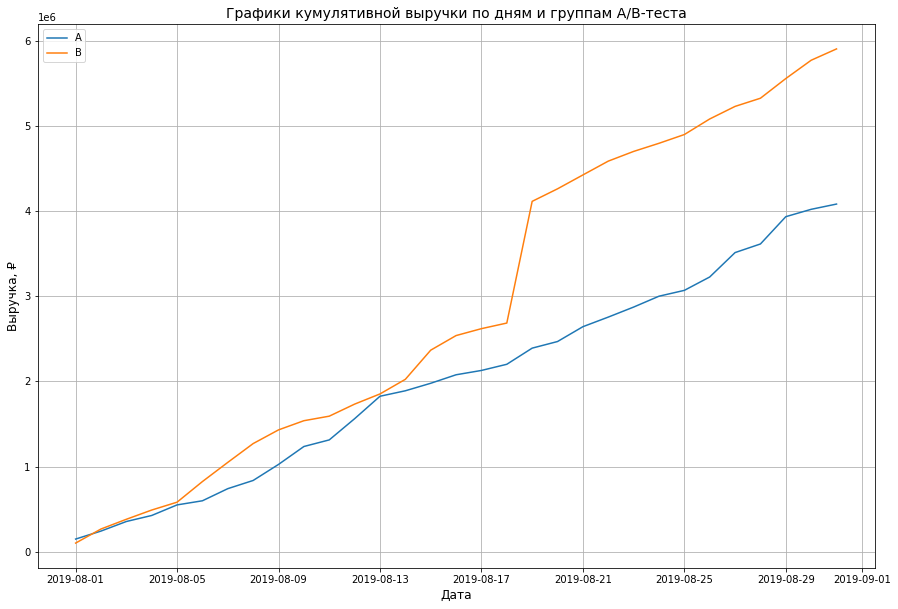

In [39]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]  
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')     
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid(visible=True)
plt.title('Графики кумулятивной выручки по дням и группам A/B-теста', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка, ₽', fontsize=12)
plt.legend()
plt.show()

Во второй половине теста сегмент В вырвался вперед и стал лидировать. Возможно, что на это повляли аномально большие заказы.

### График кумулятивного среднего чека по группам 

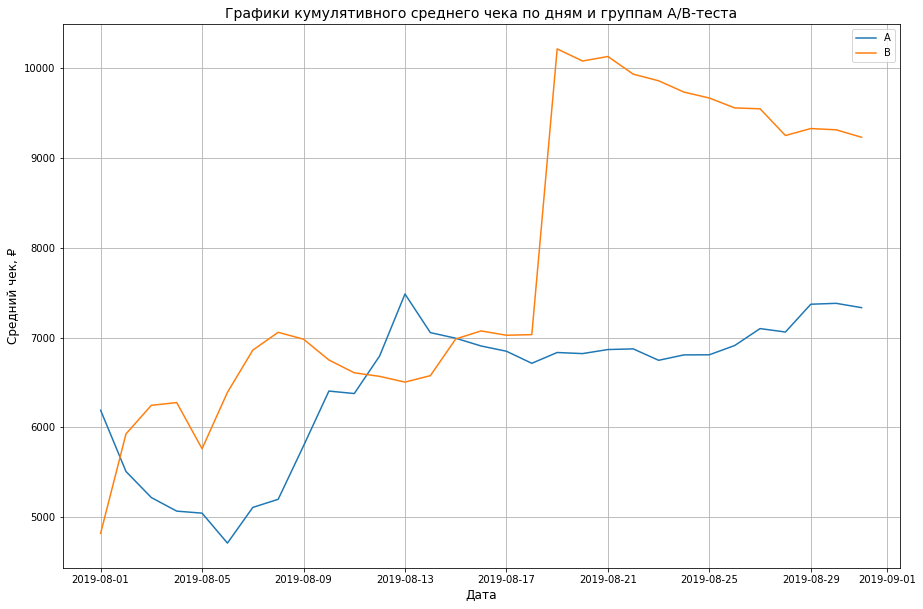

In [40]:
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-теста', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек, ₽', fontsize=12)
plt.legend()
plt.show()

Похожая картинка и на графике кумулятиного среднего чека по группам. Во второй половине теста сегмент В вырвался вперед. Скорее всего на это повлияли аномально большие заказы.

### График относительного изменения кумулятивного среднего чека группы B к группе A 

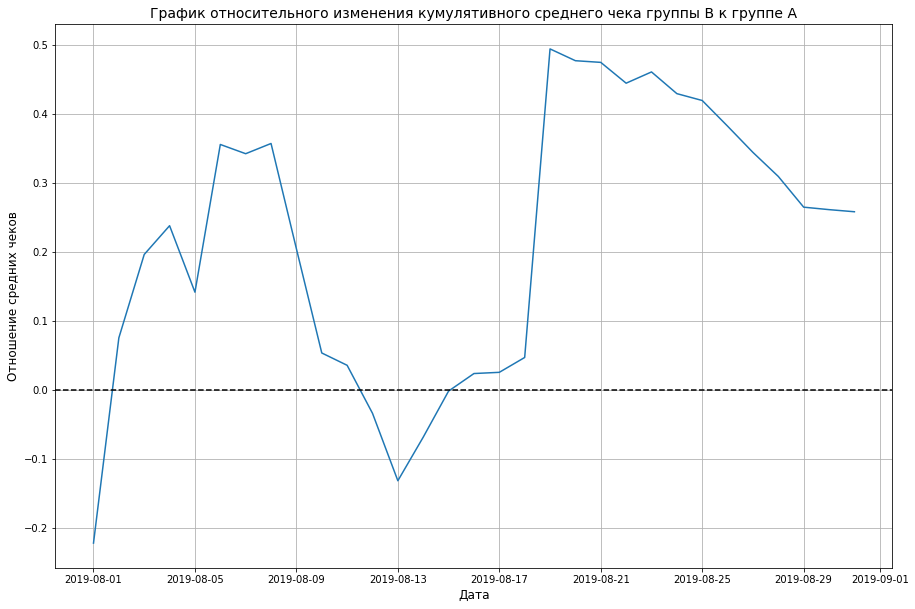

In [41]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 10))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)

plt.show()

Результаты теста резко менялись несколько раз. Возможно в эти даты были аномально большие заказы.

### График кумулятивного среднего количества заказов на посетителя по группам

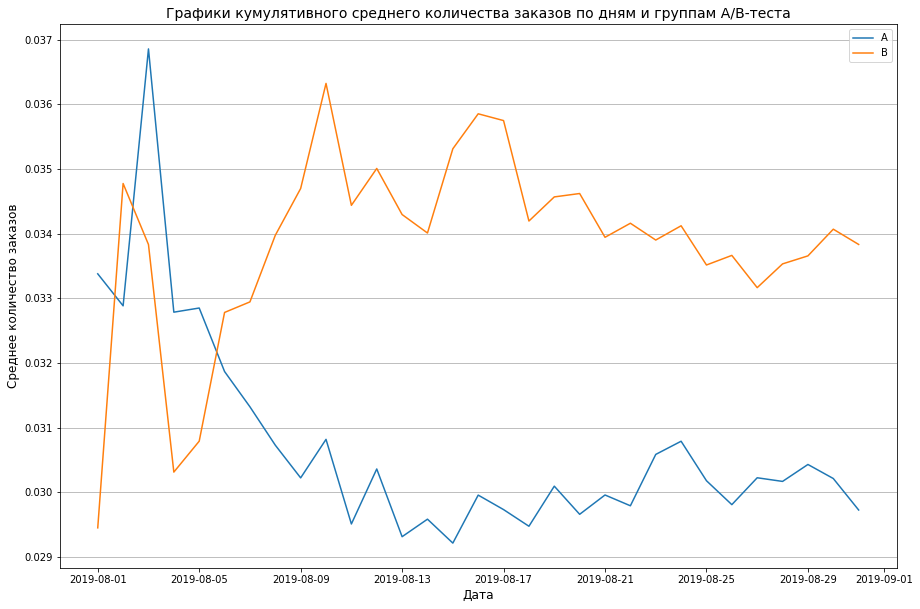

In [42]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid(axis = 'y')
plt.title('Графики кумулятивного среднего количества заказов по дням и группам A/B-теста', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее количество заказов', fontsize=12)
plt.legend()
plt.show()


В начале теста сегмент А имел большее кумулятивное среднее количество заказов, однако впоследствии сегмент В выровнялся и зафиксировался примерно на одном значении, большем значения сегмента А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

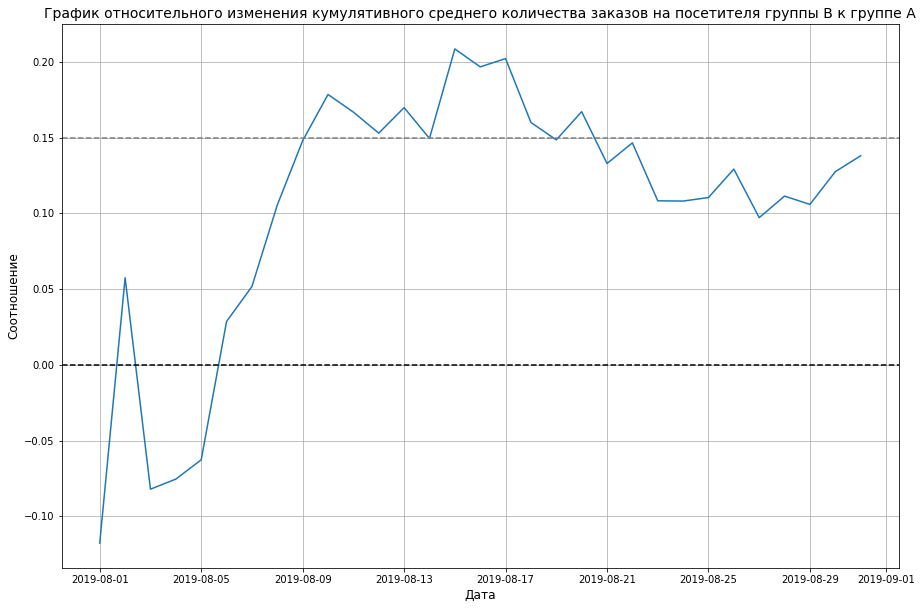

In [43]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Соотношение', fontsize=12)

plt.show()

В начале теста сегмент В проигрывал А, но потом вырвался вперед и стабилизировался на уровне 10-20%

### Точечный график количества заказов по пользователям

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


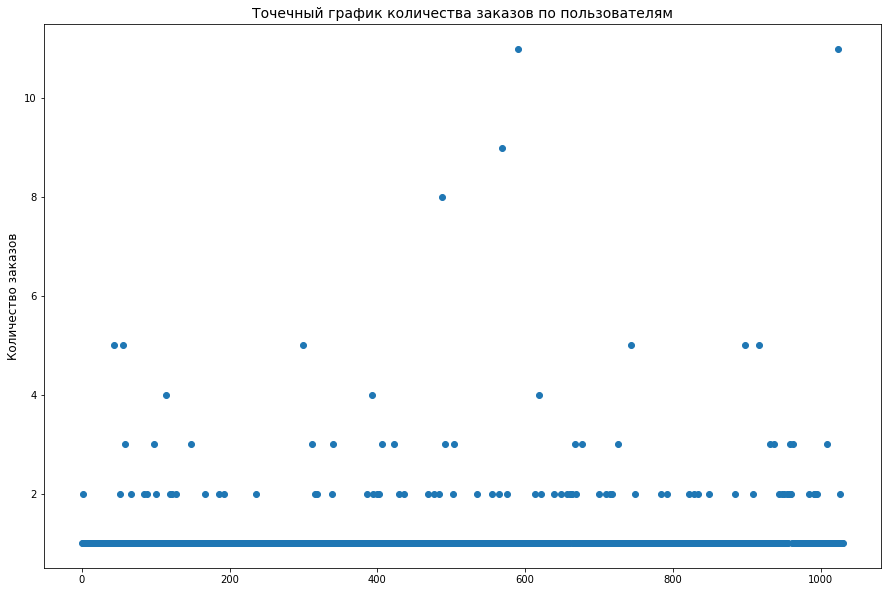

In [44]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)

plt.show()

Основная масса пользователей сделало 1 заказ. Однако есть группа пользователей, совершивших от 2 до 4 заказов.

 ### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

In [45]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей совершили более 2 заказов и не более 1% - более 4. Соответственно будем считать нижней границей 4 заказа на одного пользователя. Все остальное - аномальное количество. 

### Точечный график стоимостей заказов

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A
743       3603576309  4133034833 2019-08-09    67990     A
1103      1348774318  1164614297 2019-08-12    66350     A
1099       316924019   148427295 2019-08-12    65710     A


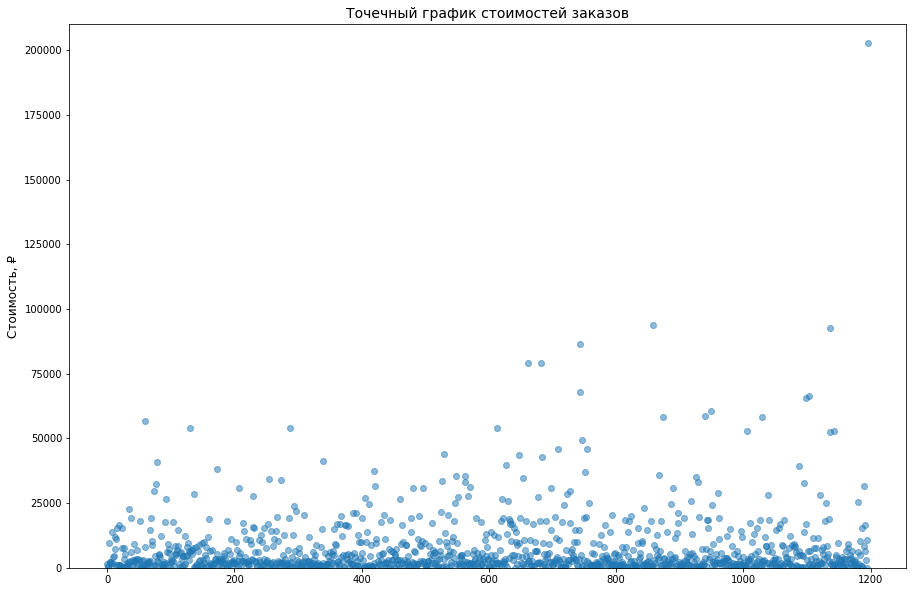

In [46]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders['revenue'], alpha=0.5) 
plt.title('Точечный график стоимостей заказов', fontsize=14)
plt.ylabel('Стоимость, ₽', fontsize=12)
plt.ylim(0, 210000)
plt.show()


Основная масса заказов лежит в диапазоне до 75000 руб.

### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов

In [47]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Стоимость более 28000 руб. имеют не более 5% заказов, стоимость более 58233,2 руб. - не более 1% заказа

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [48]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))



        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия в среднем между группами есть.

P-value меньше 0,05, значит нулевую гипотезу отвергаем. Анализ "сырых" данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия.
Относительный прирост конверсии группы В относительно конверсии группы А - 13,8%.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [49]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Сформулируем гипотезы. 

Нулевая: различий в среднем чеке заказа между группами нет. 

Альтернативная: различия в среднем чеке заказа между группами есть.

P-value больше 0,05, значит отвергнуть нулевую гипотезу нет оснований. 
Относительное различие среднего чека между группой В и группой А - 25,9%. Средний чек группы В больше.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [50]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 



1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
15


Вывлено 15 аномальных пользователей.

In [51]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия в среднем между группами есть.

P-value по "очищенным" данным меньше 0,05, значит нулевую гипотезу отвергаем. Анализ "очищенных" данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия.
Относительный прирост конверсии группы В относительно конверсии группы А - 15,3%.
Результаты по "очищенным" данным не сильно отличаются от результатов по "сырым" данным.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [52]:
print('{0:.3f}'.format(
    stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],)[1])
)

print("{0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean()
        / orders[ np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean() - 1)
)

0.851
-0.006


Сформулируем гипотезы. 

Нулевая: различий в среднем чеке заказа между группами нет. 

Альтернативная: различия в среднем чеке заказа между группами есть.

P-value по "очищенным" данным больше 0,05, значит отвергнуть нулевую гипотезу мы не можем. 
Относительное различие среднего чека между группой В и группой А - -0,6%. Средний чек группы А больше, чем группы В. При анализе "сырых" данных было наоборот.

## Вывод

1. В файле, содержащем данные о гипотезах, присутствуют 9 гипотез. В процессе приоритизации гипотез выявлены наиболее перспективные по ICE: 8 - запустить акцию, дающую скидку на товар в день рождения,

          0 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 

          7 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, 

          6 - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
    по RICE: 7 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, 

 2 - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, 

 0 - добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 

 6 - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
 На первом месте по RICE стоит гипотеза 7 (добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок). Фрейморк RICE учитывает параметр REACH, а он у 7-й гипотезы - максимален. 7-я гипотеза затронет наибольшее количество пользователей.

2. На графике кумулятивной выручке по группам видно, что во второй половине теста сегмент В вырвался вперед и стал лидировать. Возможно, что на это повляли аномально большие заказы.

3. Похожая картинка и на графике кумулятиного среднего чека по группам. Во второй половине теста сегмент В вырвался вперед. Скорее всего на это также повлияли аномально большие заказы.

4. На графике относительного изменения кумулятивного среднего чека группы B к группе A видно, что результаты теста резко менялись несколько раз. Возможно в эти даты были аномально большие заказы. График относительного изменения кумулятивного среднего чека группы B к группе A в течение всего периода (кроме 1.08 и 12-14.08) расположен выше 0. Это свидетельствует о том, что кумулятивный средний чек группы В на протяжении всего периода больше среднего чека группы А

5. График кумулятивного среднего количества заказов на посетителя по группам показывает, что в начале теста сегмент А имел большее кумулятивное среднее количество заказов, однако впоследствии сегмент В выровнялся и зафиксировался примерно на одном значении, большем значения сегмента А.

6. На графике относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A видно, что в начале теста сегмент В проигрывал А, но потом вырвался вперед и стабилизировался на уровне 10-20%.

7. Исходя из точечного графика количества заказов по пользователям можно сделать вывод, что основная масса пользователей сделало 1 заказ. Однако есть группа пользователей, совершивших от 2 до 4 заказов.

8. Не более 5% пользователей совершили более 2 заказов и не более 1% - более 4. Соответственно будем считать нижней границей 4 заказа на одного пользователя. Все остальное - аномальное количество.

9. На основании точечного графика стоимостей заказов можно сделать вывод, что основная масса заказов лежит в диапазоне до 75000 руб.

10. Стоимость более 28000 руб. имеют не более 5% заказов, стоимость более 58233,2 руб. - не более 1% заказа.  Диапазон фильтрации выбросов: стоимость заказа более 58233,2руб.

11. Анализируя "сырые" данные, сформулированы гипотезы.

Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия в среднем между группами есть.

P-value меньше 0,05, значит нулевую гипотезу отвергаем. Анализ "сырых" данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост конверсии группы В относительно конверсии группы А - 13,8%.

12. Анализируя "сырые" данные, сформулированы гипотезы.

Нулевая: различий в среднем чеке заказа между группами нет.

Альтернативная: различия в среднем чеке заказа между группами есть.

P-value больше 0,05, значит отвергнуть нулевую гипотезу нет оснований. Относительное различие среднего чека между группой В и группой А - 25,9%. Средний чек группы В больше.

13. Анализируя "очищенные" данные, сформулированы гипотезы.

Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия в среднем между группами есть.

P-value по "очищенным" данным меньше 0,05, значит нулевую гипотезу отвергаем. Анализ "очищенных" данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост конверсии группы В относительно конверсии группы А - 15,3%. Результаты по "очищенным" данным не сильно отличаются от результатов по "сырым" данным.

14. Анализируя "очищенные" данные, сформулированы гипотезы.

Нулевая: различий в среднем чеке заказа между группами нет.

Альтернативная: различия в среднем чеке заказа между группами есть.

P-value по "очищенным" данным больше 0,05, значит отвергнуть нулевую гипотезу мы не можем. Относительное различие среднего чека между группой В и группой А - -0,6%. Средний чек группы А больше, чем группы В. При анализе "сырых" данных было наоборот.

15. Основываясь на полученных данных, считаю, что тест нужно остановить, зафиксировав победу группы В. Относительный прирост конверсии группы В относительно конверсии группы А по "сырым" данным - 13,8%, по "очищенным" - 15,3%. Все графики подтверждают превосходство группы В над группой А. Не смотря на то, что по "очищенным" данным средний чек группы А больше, чем группы В, я считаю, что остальные показатели доказывают лидирующее положение группы В на протяжении теста.
